# Mutational signatures analysis with mSigAct

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

samples_dict = json.load(open('../../../cases_ids.json','rb'))

In [2]:
#change at the end
pt_to_case = {'case1':'pt2','case2':'pt3','case3':'pt1','case4':'pt8'}
root_out = "/workspace/projects/sjd_pediatric_tumors/mafs_platinum/20220809/"
# root_out = '../vcf_postprocessing/output/'

## Create input for mSigAct
A file containing all SNV mutations from all samples. There are 2 files cretaed:
- Clonal mutations.
- Subclonal mutations.

### Clonals

In [3]:
df = pd.DataFrame()
for case in samples_dict.keys():
    pt = pt_to_case[case] # remove at the end
    root_out_pt = root_out + pt
    for tumor in ['tumor1','tumor2']:
        tumor_id = samples_dict[case][tumor]
        normal_id = samples_dict[case]['normal']
        df1 = pd.read_csv(root_out_pt+'/'+tumor_id+'_vs_'+normal_id+'/filter_and_annot/'+tumor_id+'_vs_'+normal_id+'_filt.maf.gz', sep='\t')
        
        df1 = df1[['#CHROM','POS','REF','ALT','SAMPLE']][(df1['mut_type']=='snv')&(df1['clonal']==True)]
        df = pd.concat([df,df1],ignore_index=True)
df = df.rename(columns={'#CHROM':'CHROM'})
df

,CHROM,POS,REF,ALT,SAMPLE
0,chr1,2124674,G,A,AQ5181_vs_AQ5175
1,chr1,10680552,C,G,AQ5181_vs_AQ5175
2,chr1,16443082,C,A,AQ5181_vs_AQ5175
3,chr1,24524785,G,T,AQ5181_vs_AQ5175
4,chr1,29334170,G,T,AQ5181_vs_AQ5175
...,...,...,...,...,...
8762,chrX,114639288,A,G,AW8051_vs_AW8061
8763,chrX,127052622,G,A,AW8051_vs_AW8061
8764,chrX,143856134,G,A,AW8051_vs_AW8061
8765,chrX,145440422,T,A,AW8051_vs_AW8061


In [4]:
df.groupby('ALT').count()  # check that there are no indels

,CHROM,POS,REF,SAMPLE
ALT,,,,
A,2934,2934,2934,2934
C,1502,1502,1502,1502
G,1413,1413,1413,1413
T,2918,2918,2918,2918


In [5]:
df.to_csv('./input/mutations_clonals.tsv.gz',sep='\t',index=None,compression='gzip')

### Subclonals

In [19]:
df = pd.DataFrame()
for case in samples_dict.keys():
    pt = pt_to_case[case] # remove at the end
    root_out_pt = root_out + pt
    for tumor in ['tumor1','tumor2']:
        tumor_id = samples_dict[case][tumor]
        normal_id = samples_dict[case]['normal']
        df1 = pd.read_csv(root_out_pt+'/'+tumor_id+'_vs_'+normal_id+'/filter_and_annot/'+tumor_id+'_vs_'+normal_id+'_filt.maf.gz', sep='\t')
        
        df1 = df1[['#CHROM','POS','REF','ALT','SAMPLE']][(df1['mut_type']=='snv')&(df1['clonal']==False)]
        df = pd.concat([df,df1],ignore_index=True)
df = df.rename(columns={'#CHROM':'CHROM'})
df

,CHROM,POS,REF,ALT,SAMPLE
0,chr1,3812176,T,C,AQ5181_vs_AQ5175
1,chr1,6993922,G,T,AQ5181_vs_AQ5175
2,chr1,14917188,G,T,AQ5181_vs_AQ5175
3,chr1,15453875,G,C,AQ5181_vs_AQ5175
4,chr1,20795865,G,C,AQ5181_vs_AQ5175
...,...,...,...,...,...
4010,chrX,108814008,G,A,AW8051_vs_AW8061
4011,chrX,118499583,C,T,AW8051_vs_AW8061
4012,chrX,119447007,G,A,AW8051_vs_AW8061
4013,chrX,144321775,C,T,AW8051_vs_AW8061


In [20]:
df.groupby('ALT').count()  # check that there are no indels

,CHROM,POS,REF,SAMPLE
ALT,,,,
A,1294,1294,1294,1294
C,733,733,733,733
G,667,667,667,667
T,1321,1321,1321,1321


In [8]:
df.to_csv('./input/mutations_subclonals.tsv.gz',sep='\t',index=None,compression='gzip')

## Execute mSigAct
Follow the instructions at the ```./mSigAct/``` folder.\
Once obtained the output, it can be read in the following code and the plots can be created.

## Functions to plot signature fitting analysis

In [21]:
#define a list with sample ids with CNAG barcode
order_list = df['SAMPLE'].unique().tolist()

In [9]:
def color_sigs (sigs):

    colors_dict = {}
    colors_list = []
    greys = ['gainsboro','darkgrey','gray','lightgrey','lightgray','silver','dimgrey','dimgray','slategrey']
    i = 0
    for sig in sigs:
        if 'potential' in sig:
            color = greys[i]
            i+=1
        elif 'SBS1-' in sig or sig=='SBS1':
            color = 'orange'
        elif 'SBS2-' in sig or sig=='SBS2':
            color = 'olive'
        elif 'SBS3-' in sig or sig=='SBS3':
            color = 'mediumpurple'
        elif 'SBS5-' in sig or sig=='SBS5':
            color = 'skyblue'
        elif 'SBS7a' in sig:
            color = 'teal'
        elif 'SBS12' in sig:
            color = 'seagreen'
        elif 'SBS13' in sig:
            color = 'purple'
        elif 'SBS17b' in sig:
            color = 'pink'
        elif 'SBS18' in sig:
            color = 'royalblue'
        elif 'SBS31' in sig:
            color = 'firebrick'
        elif 'SBS32' in sig:
            color = 'plum'
        elif 'SBS35' in sig:
            color = 'lightcoral'
        elif 'SBS40' in sig:
            color = 'turquoise'
        elif 'SBS60' in sig:
            color = 'darkseagreen'
        else:
            color = greys[i]
            i+=1
            pass
        colors_dict[sig] = color
        colors_list.append(color)
    return colors_dict,colors_list

In [106]:
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

def plot_fitting_per_pt (df,title,ylim,legend,labels=['Subclonal','Clonal'],figsize=(3,2),text_pos=200,pos1=1,pos2=1,x_ticks_size=14):
    
    sigs = [sig for sig in df.columns.tolist() if sig != 'clonal']
    colors_dict,colors_list = color_sigs(sigs)
    df.plot(kind='bar', stacked=True, figsize=figsize,color=colors_list,legend=legend)
    
    if legend == True:
        plt.legend(title='Signatures', bbox_to_anchor=(pos1, pos2), loc='upper left')
        
    muts_subclonal = df1[sigs].sum(axis=1)[0]
    muts_clonal = df1[sigs].sum(axis=1)[1]

    plt.text(0,muts_subclonal+text_pos,str(int(round(muts_subclonal,0))),color='black', fontweight='normal',ha='center',va='center',size=15)
    plt.text(1,muts_clonal+text_pos,str(int(round(muts_clonal,0))),color='black', fontweight='normal',ha='center',va='center',size=15)

    plt.ylabel('Number of\nmutations',size=16)

    plt.axvline(0.5,linestyle='--',c='black')

    plt.xticks(range(0,len(df)), labels, rotation=0, size=x_ticks_size)
    plt.title(title,size=20,pad=20)
    plt.ylim(0,ylim)

    plt.xlabel(' ')

## Check mSigAct results

### mSigAct

In [11]:
#fix it at the end
root_to_msigact_clonals = '/workspace/projects/sjd_pediatric_tumors/signatures/fitting/msigact/230220_allsamples_run20220809_clonals_SBS40/'
root_to_msigact_subclonals = '/workspace/projects/sjd_pediatric_tumors/signatures/fitting/msigact/230220_allsamples_run20220809_subclonals_SBS40/'
# root_to_misgact_clonals = './msigact/clonals/'
# root_to_misgact_subclonals = './msigact/subclonals/'

path_sbs31_clonals = root_to_msigact_clonals+'output_sbs31/results.all_samples_run_20220809_clonals.matrix.tsv.mSigAct.SBS31.tsv'
path_sbs31_subclonals = root_to_msigact_subclonals+'output_sbs31/results.all_samples_run_20220809_subclonals.matrix.tsv.mSigAct.SBS31.tsv'
# path_sbs31_clonals = root_to_msigact_clonals+'output_sbs31/results.clonals.matrix.tsv.mSigAct.SBS31.tsv'
# path_sbs31_subclonals = root_to_msigact_subclonals+'output_sbs31/results.subclonals.matrix.tsv.mSigAct.SBS31.tsv'

path_sbs35_clonals = root_to_msigact_clonals+'output_sbs35/results.all_samples_run_20220809_clonals.matrix.tsv.mSigAct.SBS35.tsv'
path_sbs35_subclonals = root_to_msigact_subclonals+'output_sbs35/results.all_samples_run_20220809_subclonals.matrix.tsv.mSigAct.SBS35.tsv'
# path_sbs35_clonals = root_to_msigact_clonals+'output_sbs35/results.clonals.matrix.tsv.mSigAct.SBS35.tsv'
# path_sbs35_subclonals = root_to_msigact_subclonals+'output_sbs35/results.subclonals.matrix.tsv.mSigAct.SBS35.tsv'

### Prepare plots for paper figure

In [14]:
#Prepare lists with pvalues
clonals_df = pd.read_csv(path_sbs31_clonals,sep='\t')
clonals_df = clonals_df.reindex(order_list)
clonals_df = clonals_df[['SBS1','SBS5','SBS18','SBS40','SBS31']]
clonals_df['clonal'] = True

subclonals_df = pd.read_csv(path_sbs31_subclonals,sep='\t')
subclonals_df = subclonals_df.reindex(order_list)
subclonals_df = subclonals_df[['SBS1','SBS5','SBS18','SBS40','SBS31']]
subclonals_df['clonal'] = False

df31 = pd.concat([subclonals_df,clonals_df],ignore_index=False)

In [15]:
#Prepare lists with pvalues
clonals_df = pd.read_csv(path_sbs35_clonals,sep='\t')
clonals_df = clonals_df.reindex(order_list)
clonals_df = clonals_df[['SBS1','SBS5','SBS18','SBS40','SBS35']]
clonals_df['clonal'] = True

subclonals_df = pd.read_csv(path_sbs35_subclonals,sep='\t')
subclonals_df = subclonals_df.reindex(order_list)
subclonals_df = subclonals_df[['SBS1','SBS5','SBS18','SBS40','SBS35']]
subclonals_df['clonal'] = False

df35 = pd.concat([subclonals_df,clonals_df],ignore_index=False)

## Plots separating clonal vs. subclonal, including all signatures (stacked)

### Case 1

#### ARMS, SBS31

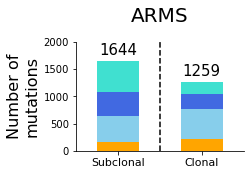

In [108]:
df = df31.copy()
case = 'case1'
tumor1_id = samples_dict[case]['tumor1']
tumor2_id = samples_dict[case]['tumor2']
normal_id = samples_dict[case]['normal']
df1 = df[df.index.isin([tumor1_id+'_vs_'+normal_id])]

title = 'ARMS'
ylim = 2000
legend = False
x_ticks_size = 11

plot_fitting_per_pt(df1,title,ylim,legend,x_ticks_size=x_ticks_size)

plt.savefig('./figures_paper/case1_arms_sbs31_all_signatures.png',dpi=300, format='png',transparent=True,bbox_inches='tight')

plt.show()

#### ARMS, SBS35

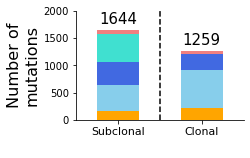

In [98]:
df = df35.copy()
case = 'case1'
tumor1_id = samples_dict[case]['tumor1']
tumor2_id = samples_dict[case]['tumor2']
normal_id = samples_dict[case]['normal']
df1 = df[df.index.isin([tumor1_id+'_vs_'+normal_id])]

title = ''
ylim = 2000
legend = False
x_ticks_size = 11

plot_fitting_per_pt(df1,title,ylim,legend,x_ticks_size=x_ticks_size)

plt.savefig('./figures_paper/case1_arms_sbs35_all_signatures.png',dpi=300, format='png',transparent=True,bbox_inches='tight')

plt.show()

#### tAML, SBS31

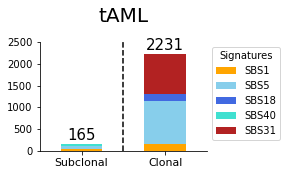

In [107]:
df = df31.copy()
case = 'case1'
tumor1_id = samples_dict[case]['tumor1']
tumor2_id = samples_dict[case]['tumor2']
normal_id = samples_dict[case]['normal']
df1 = df[df.index.isin([tumor2_id+'_vs_'+normal_id])]

title = 'tAML'
ylim = 2500
legend=True
x_ticks_size = 11

plot_fitting_per_pt(df1,title,ylim,legend,x_ticks_size=x_ticks_size)

plt.ylabel('')

plt.savefig('./figures_paper/case1_taml_sbs31_all_signatures.png',dpi=300, format='png',transparent=True,bbox_inches='tight')

plt.show()

#### tAML, SBS35

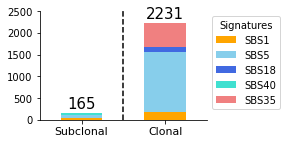

In [101]:
df = df35.copy()
case = 'case1'
tumor1_id = samples_dict[case]['tumor1']
tumor2_id = samples_dict[case]['tumor2']
normal_id = samples_dict[case]['normal']
df1 = df[df.index.isin([tumor2_id+'_vs_'+normal_id])]

title = ''
ylim = 2500
legend = True
x_ticks_size = 11

plot_fitting_per_pt(df1,title,ylim,legend,x_ticks_size=x_ticks_size)

plt.ylabel('')

plt.savefig('./figures_paper/case1_taml_sbs35_all_signatures.png',dpi=300, format='png',transparent=True,bbox_inches='tight')

plt.show()

### Case 2

#### EPN, SBS31

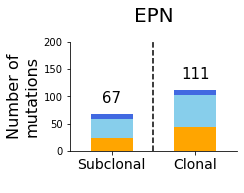

In [109]:
df = df31.copy()
case = 'case2'
tumor1_id = samples_dict[case]['tumor1']
tumor2_id = samples_dict[case]['tumor2']
normal_id = samples_dict[case]['normal']
df1 = df[df.index.isin([tumor1_id+'_vs_'+normal_id])]

title = 'EPN'
ylim = 200
legend = False
text_pos = 30

plot_fitting_per_pt(df1,title,ylim,legend,text_pos=text_pos)

plt.savefig('./figures_paper/case2_epn_sbs31_all_signatures.png',dpi=300, format='png',transparent=True,bbox_inches='tight')

plt.show()

#### EPN, SBS35

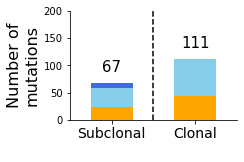

In [104]:
df = df35.copy()
case = 'case2'
tumor1_id = samples_dict[case]['tumor1']
tumor2_id = samples_dict[case]['tumor2']
normal_id = samples_dict[case]['normal']
df1 = df[df.index.isin([tumor1_id+'_vs_'+normal_id])]

title = ''
ylim = 200
legend = False
text_pos = 30

plot_fitting_per_pt(df1,title,ylim,legend,text_pos=text_pos)

plt.savefig('./figures_paper/case2_epn_sbs35_all_signatures.png',dpi=300, format='png',transparent=True,bbox_inches='tight')

plt.show()

#### DMG, SBS31

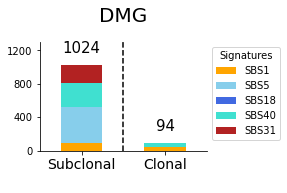

In [110]:
df = df31.copy()
case = 'case2'
tumor1_id = samples_dict[case]['tumor1']
tumor2_id = samples_dict[case]['tumor2']
normal_id = samples_dict[case]['normal']
df1 = df[df.index.isin([tumor2_id+'_vs_'+normal_id])]

title = 'DMG'
ylim = 1300
legend=True

plot_fitting_per_pt(df1,title,ylim,legend)

plt.yticks(np.arange(0,1400,400))
plt.ylabel('')

plt.savefig('./figures_paper/case2_dmg_sbs31_all_signatures.png',dpi=300, format='png',transparent=True,bbox_inches='tight')

plt.show()

#### DMG, SBS35

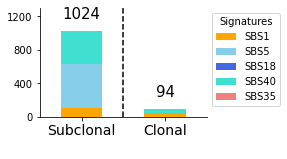

In [112]:
df = df35.copy()
case = 'case2'
tumor1_id = samples_dict[case]['tumor1']
tumor2_id = samples_dict[case]['tumor2']
normal_id = samples_dict[case]['normal']
df1 = df[df.index.isin([tumor2_id+'_vs_'+normal_id])]

title = ''
ylim = 1300
legend = True

plot_fitting_per_pt(df1,title,ylim,legend,labels)

plt.yticks(np.arange(0,1400,400))
plt.ylabel('')

plt.savefig('./figures_paper/case2_dmg_sbs35_all_signatures.png',dpi=300, format='png',transparent=True,bbox_inches='tight')

plt.show()

### Case 3

#### NB, SBS31

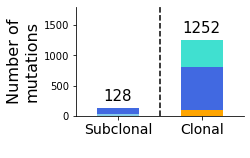

In [113]:
df = df31.copy()
case = 'case3'
tumor1_id = samples_dict[case]['tumor1']
tumor2_id = samples_dict[case]['tumor2']
normal_id = samples_dict[case]['normal']
df1 = df[df.index.isin([tumor1_id+'_vs_'+normal_id])]

title=''
ylim = 1800
legend=False

plot_fitting_per_pt(df1,title,ylim,legend)

plt.savefig('./figures_paper/case3_nb_sbs31_all_signatures.png',dpi=300, format='png',transparent=True,bbox_inches='tight')

plt.show()

#### NB, SBS35

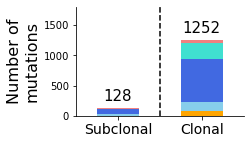

In [115]:
df = df35.copy()
case = 'case3'
tumor1_id = samples_dict[case]['tumor1']
tumor2_id = samples_dict[case]['tumor2']
normal_id = samples_dict[case]['normal']
df1 = df[df.index.isin([tumor1_id+'_vs_'+normal_id])]

title=''
ylim = 1800
legend=False

plot_fitting_per_pt(df1,title,ylim,legend)

plt.savefig('./figures_paper/case3_nb_sbs35_all_signatures.png',dpi=300, format='png',transparent=True,bbox_inches='tight')

plt.show()

#### MRT, SBS31

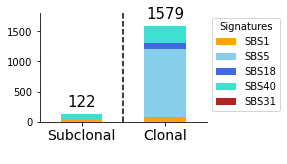

In [119]:
df = df31.copy()
case = 'case3'
tumor1_id = samples_dict[case]['tumor1']
tumor2_id = samples_dict[case]['tumor2']
normal_id = samples_dict[case]['normal']
df1 = df[df.index.isin([tumor2_id+'_vs_'+normal_id])]

title = ''
ylim = 1800
legend = True

plot_fitting_per_pt(df1,title,ylim,legend)

plt.ylabel('')

plt.savefig('./figures_paper/case3_mrt_sbs31_all_signatures.png',dpi=300, format='png',transparent=True,bbox_inches='tight')

plt.show()

#### MRT, SBS35

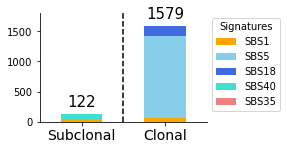

In [120]:
df = df35.copy()
case = 'case3'
tumor1_id = samples_dict[case]['tumor1']
tumor2_id = samples_dict[case]['tumor2']
normal_id = samples_dict[case]['normal']
df1 = df[df.index.isin([tumor2_id+'_vs_'+normal_id])]

title = ''
ylim = 1800
legend = True

plot_fitting_per_pt(df1,title,ylim,legend)

plt.ylabel('')

plt.savefig('./figures_paper/case3_mrt_sbs35_all_signatures.png',dpi=300, format='png',transparent=True,bbox_inches='tight')

plt.show()

## Plots with 2 bars, separating platinum vs. aging signatures

In [129]:
def plot_2_bars (sample_id,title,ylim,y_val):
    
    df1 = df[df.index.isin([sample_id])]

    other_sigs = ['SBS1','SBS5','SBS18','SBS40']

    df1['other_sigs'] = df1[other_sigs].sum(axis=1)
    df1 = df1[['SBS31','other_sigs','clonal']]

    colors_dict,colors_list = color_sigs(sigs)

    figsize = (3,2)
    legend=False
    pos1=1
    pos2=1

    pos1=0.05
    pos2=-0.2

    fig, ax = plt.subplots(figsize=figsize)

    for x,val in enumerate(df1['SBS31'].tolist()):
        pos = x-0.2
        ax.bar(pos, val,color='firebrick',width=0.2)


    for x,val in enumerate(df1['other_sigs'].tolist()):
        pos = x +0.2
        ax.bar(pos, val,color='grey',width=0.2)


    if legend == True:
        plt.legend(title='Signatures', bbox_to_anchor=(pos1, pos2), loc='upper left')

    plt.xticks(range(0,len(df1)), labels, rotation=0)
    plt.title(title,size=20,pad=20)
    plt.ylabel('Number of mutations')
    plt.ylim(0,ylim)

    plt.xlabel(' ')

    plt.ylabel('Number of\nmutations',size=16)
    plt.xticks(size=14)

    mpl.rcParams['axes.spines.right'] = False
    mpl.rcParams['axes.spines.top'] = False

    plt.axvline(0.5,linestyle='--',c='black')
    
    for i, v in enumerate(df1['SBS31']):
        plt.text(i-0.2, v+y_val, str(int(round(v,0))), color='firebrick', fontweight='normal',ha='center',va='center',size=15)
    for i, v in enumerate(df1['other_sigs']):
        plt.text(i+0.2, v+y_val, str(int(round(v,0))), color='grey', fontweight='normal',ha='center',va='center',size=15)



### Plot legend

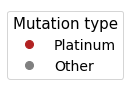

In [135]:
import matplotlib.lines as mlines
fig, ax = plt.subplots(figsize=(1,1))
plt.xticks([])
plt.yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

sbs31 = mlines.Line2D([], [], color='firebrick', marker='o', linestyle='None',
                          markersize=8, label='Platinum')
other_signatures = mlines.Line2D([], [], color='grey', marker='o', linestyle='None',
                          markersize=8, label='Other')

plt.legend(handles=[sbs31,other_signatures],bbox_to_anchor=(1,0.05,1,1),fontsize=14,title='Mutation type',title_fontsize=15)
plt.savefig('./figures_paper/legend_platinum_vs_other.png',dpi=300, format='png',transparent=True,bbox_inches='tight')


## Case 1

### ARMS, SBS31

/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


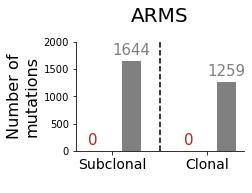

In [136]:
df = df31.copy()
case = 'case1'
tumor1_id = samples_dict[case]['tumor1']
tumor2_id = samples_dict[case]['tumor2']
normal_id = samples_dict[case]['normal']

sample_id = tumor1_id + '_vs_'+normal_id

ylim = 2000
title='ARMS'
y_val = 200
plot_2_bars (sample_id,title,ylim,y_val)
plt.savefig('./figures_paper/case1_arms_sbs31_vs_others.png',dpi=300, format='png',transparent=True,bbox_inches='tight')

plt.show()

### tAML, SBS31

/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


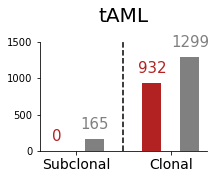

In [137]:
df = df31.copy()
case = 'case1'
tumor1_id = samples_dict[case]['tumor1']
tumor2_id = samples_dict[case]['tumor2']
normal_id = samples_dict[case]['normal']

sample_id = tumor2_id + '_vs_'+normal_id

ylim = 1500
title='tAML'
y_val = 200
plot_2_bars (sample_id,title,ylim,y_val)
plt.ylabel('')
plt.savefig('./figures_paper/case1_taml_sbs31_vs_others.png',dpi=300, format='png',transparent=True,bbox_inches='tight')

plt.show()

## Case 2

### EPN, SBS31

/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


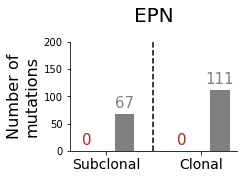

In [133]:
df = df31.copy()
case = 'case2'
tumor1_id = samples_dict[case]['tumor1']
tumor2_id = samples_dict[case]['tumor2']
normal_id = samples_dict[case]['normal']

sample_id = tumor1_id + '_vs_'+normal_id

ylim = 200
title='EPN'
y_val = 20
plot_2_bars (sample_id,title,ylim,y_val)
plt.savefig('./figures_paper/case2_epn_sbs31_vs_others.png',dpi=300, format='png',transparent=True,bbox_inches='tight')

plt.show()

### DMG, SBS31

/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


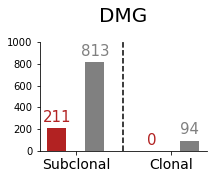

In [134]:
df = df31.copy()
case = 'case2'
tumor1_id = samples_dict[case]['tumor1']
tumor2_id = samples_dict[case]['tumor2']
normal_id = samples_dict[case]['normal']

sample_id = tumor2_id + '_vs_'+normal_id

ylim = 1000
title='DMG'
y_val = 100
plot_2_bars (sample_id,title,ylim,y_val)
plt.ylabel('')
plt.savefig('./figures_paper/case2_dmg_sbs31_vs_others.png',dpi=300, format='png',transparent=True,bbox_inches='tight')

plt.show()

## Case 3

### NB, SBS31

/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


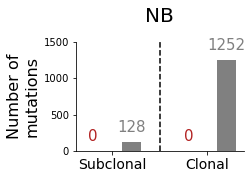

In [131]:
df = df31.copy()
case = 'case3'
tumor1_id = samples_dict[case]['tumor1']
tumor2_id = samples_dict[case]['tumor2']
normal_id = samples_dict[case]['normal']

sample_id = tumor1_id + '_vs_'+normal_id

ylim = 1500
title = 'NB'
y_val = 200
plot_2_bars (sample_id,title,ylim,y_val)
plt.savefig('./figures_paper/case3_nb_sbs31_vs_others.png',dpi=300, format='png',transparent=True,bbox_inches='tight')

plt.show()

### MRT, SBS31

/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


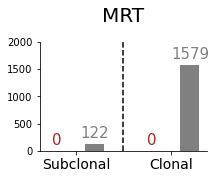

In [132]:
df = df31.copy()
case = 'case3'
tumor1_id = samples_dict[case]['tumor1']
tumor2_id = samples_dict[case]['tumor2']
normal_id = samples_dict[case]['normal']

sample_id = tumor2_id + '_vs_'+normal_id

ylim = 2000
title='MRT'
y_val=200
plot_2_bars (sample_id,title,ylim,y_val)
plt.ylabel('')
plt.savefig('./figures_paper/case_mrt_sbs31_vs_others.png',dpi=300, format='png',transparent=True,bbox_inches='tight')

plt.show()

-------------------------------

## Platinum vs. aging

To be able to run this part, first the duplex sequencing part needs to be executed

In [39]:
import json

In [40]:
file = '/workspace/projects/sjd_pediatric_tumors/twinstrand_analysis/20230414_all_samples/signatures/msigact/sigs_from_combinatorial_refitting_curated_recalculated_counts/ci_sbs31.json'
ci_sbs31_dict = json.load(open(file,'rb'))
file = '/workspace/projects/sjd_pediatric_tumors/twinstrand_analysis/20230414_all_samples/signatures/msigact/sigs_from_combinatorial_refitting_curated_recalculated_counts/ci_aging.json'
ci_aging_dict = json.load(open(file,'rb'))

In [41]:
def small_barplot (SBS31_df,selected_sample,figsize=(1,2),ylim=400,x_val1=150,x_val2=150,range_val=200):
    print(selected_sample)
    s = selected_sample[0]
    aging_sigs = ['SBS1','SBS5','SBS40']
    df = SBS31_df[SBS31_df.index.isin(selected_sample)]
    df['aging_sigs'] = df[aging_sigs].sum(axis=1)
    df = df[['SBS31','aging_sigs']]
    sigs = df.columns.tolist()
    labels = []
    title = ''
    xlabel=''
    ylabel='Number of\nmutations'
    loc=-80
    legend=False

    rotation_xtick=0
    rotation_pvals=0
    ha='center'
    
    display(df)

    ci_low = [ df['SBS31'][df.index==s].iloc[0] - ci_sbs31_dict[s][0] for s in selected_sample]
    ci_high = [ ci_sbs31_dict[s][1] - df['SBS31'][df.index==s].iloc[0] for s in selected_sample]

    horizontal_line_width = 0.04

    fig, ax = plt.subplots(figsize=figsize)

    for x,val in enumerate(df['SBS31'].tolist()):
#         if s in ['AZ6342','AZ6371']:
#             ax.plot(x, 0, 'o',color='white',markersize=10)
#         else:
        pos = x
        left = pos - horizontal_line_width / 2
        top = val + ci_high[x]
        right = pos + horizontal_line_width / 2
        bottom = val - ci_low[x]
        ax.bar(pos, val, color='firebrick',width=0.1,edgecolor='firebrick')
        ax.plot([pos, pos], [top, bottom], color='k',linewidth=1.5)
        ax.plot([left, right], [top, top], color='k',linewidth=1.5)
        ax.plot([left, right], [bottom, bottom], color='k',linewidth=1.5)

    ci_low = [ df['aging_sigs'][df.index==s].iloc[0] - ci_aging_dict[s][0] for s in selected_sample]
    ci_high = [ ci_aging_dict[s][1] - df['aging_sigs'][df.index==s].iloc[0] for s in selected_sample]

    for x,val in enumerate(df['aging_sigs'].tolist()):
        pos = x +0.2
        left = pos - horizontal_line_width / 2
        top = val + ci_high[x]
        right = pos + horizontal_line_width / 2
        bottom = val - ci_low[x]
        ax.bar(pos, val, color='cornflowerblue',width=0.1,edgecolor='cornflowerblue')
        ax.plot([pos, pos], [top, bottom], color='k',linewidth=1.5)
        ax.plot([left, right], [top, top], color='k',linewidth=1.5)
        ax.plot([left, right], [bottom, bottom], color='k',linewidth=1.5)

    plt.title(title,size=20,pad=20)
    plt.margins(0.22,0)

    #y-axis
    plt.ylabel(ylabel,size=14)
    plt.ylim(0,ylim)

    #x-axis
    plt.xlabel(xlabel)
    ticks = range(0,len(df))
    plt.xticks(ticks,[])
    plt.yticks(np.arange(0, ylim+100, range_val),size=14)

    for i, v in enumerate(df['SBS31']):
        plt.text(i+0.02, v+x_val1, str(int(round(v,0))), color='firebrick', fontweight='normal',ha='center',va='center',size=15)
    
    for i, v in enumerate(df['aging_sigs']):
        plt.text(i+0.2, v+x_val2, str(int(round(v,0))), color='cornflowerblue', fontweight='normal',ha='center',va='center',size=15)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_linewidth(2) 
    ax.spines['bottom'].set_linewidth(2)
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2,length=7)


    ax.grid(False)
    #plt.savefig('/workspace/projects/sjd_pediatric_tumors/twinstrand_analysis/20230414_all_samples/'+selected_sample[0]+'_platinumn_vs_aging_num_muts.png',dpi=300, format='png',transparent=True,bbox_inches='tight')

In [42]:
df31

,SBS1,SBS5,SBS18,SBS40,SBS31,clonal
AQ5180_vs_AQ5174,0.000000e+00,29.230568,9.876943e+01,0.000000e+00,0.000000e+00,False
AQ5186_vs_AQ5174,3.179263e+01,0.000000,0.000000e+00,9.020737e+01,0.000000e+00,False
AQ5181_vs_AQ5175,1.593222e+02,489.909243,4.288937e+02,5.658748e+02,0.000000e+00,False
AQ5187_vs_AQ5175,4.939701e+01,56.040103,0.000000e+00,5.956288e+01,0.000000e+00,False
AQ5182_vs_AQ5176,2.397885e+01,35.336415,7.684735e+00,4.534318e-27,1.059910e-28,False
AQ5188_vs_AQ5176,9.832108e+01,428.225007,0.000000e+00,2.866437e+02,2.108102e+02,False
AQ5183_vs_AQ5177,5.517848e+01,149.635014,7.187244e+01,1.213141e+02,0.000000e+00,False
AQ5189_vs_AQ5177,NaN,NaN,NaN,NaN,NaN,False
AQ5184_vs_AQ5178,1.815046e+02,94.333329,1.845946e+02,1.275675e+02,0.000000e+00,False
AQ5190_vs_AQ5178,4.536078e+01,471.859355,0.000000e+00,6.743936e+02,3.203863e+02,False


['AQ5181_vs_AQ5175']


/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,SBS31,aging_sigs
AQ5181_vs_AQ5175,0.0,991.219395


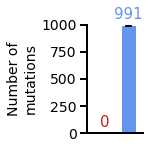

In [43]:
selected_sample = ['AQ5181_vs_AQ5175']
df = df31[df31['clonal']==True]
small_barplot(df,selected_sample,figsize=(1,2),ylim=1000,x_val1=100,x_val2=100,range_val=250)
plt.savefig('/workspace/projects/sjd_pediatric_tumors/signatures/fitting/msigact/'+selected_sample[0]+'_platinumn_vs_aging_num_muts.png',dpi=300, format='png',transparent=True,bbox_inches='tight')


['AQ5187_vs_AQ5175']


/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,SBS31,aging_sigs
AQ5187_vs_AQ5175,931.960407,1135.726213


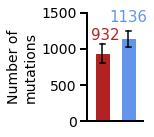

In [44]:
selected_sample = ['AQ5187_vs_AQ5175']
df = df31[df31['clonal']==True]
small_barplot(df,selected_sample,figsize=(1,2),ylim=1500,x_val1=250,x_val2=300,range_val=500)
plt.savefig('/workspace/projects/sjd_pediatric_tumors/signatures/fitting/msigact/'+selected_sample[0]+'_platinumn_vs_aging_num_muts.png',dpi=300, format='png',transparent=True,bbox_inches='tight')


In [45]:
dates_dict = {'pt2':{'DOB':'08-05-2000',
                     'AQ5181_vs_AQ5175':'13-12-2013',
                   'AQ5187_vs_AQ5175':'23-12-2013'}} #second neoplasm date we put the start of the treatment


def calculate_time(row,samples):
    date_dob = row['DOB']
    day_dob = date_dob.split('-')[0]
    month_dob = date_dob.split('-')[1]
    year_dob = date_dob.split('-')[2]
    for sample in samples:
        date_sample = row[sample]
        day_sample = date_sample.split('-')[0]
        month_sample = date_sample.split('-')[1]
        year_sample = date_sample.split('-')[2]
        
        years_diff = int(year_sample) - int(year_dob)
        months_diff = int(month_sample) - int(month_dob)
        days_diff = int(day_sample) - int(day_dob)
        
        all_years_diff = years_diff + (months_diff/12) + ((days_diff/30)/12)
        
        row[sample+'_t'] = all_years_diff
        
    return row

def time_table (dates_dict,pt,selected_samples,time_unit,ttmt_days):
    dates1_df = pd.DataFrame.from_dict(dates_dict[pt],orient='index')
    dates1_df = dates1_df.T


    dates1_df = dates1_df.apply(lambda row: calculate_time(row,selected_samples),axis=1)
    cols = [sample + '_t' for sample in selected_samples]

    df1 = dates1_df[cols]
    df1 = df1.rename(columns={col:col.split('_t')[0] for col in cols})
    if time_unit == 'days':        
        for sample in selected_samples:
            df1[sample] = df1[sample].apply(lambda x: x*365)
    
    df1 = df1.T
    if time_unit == 'days':
        df1['time_ttmt'] = ttmt_days
    elif time_unit == 'years':
        ttmt_years = ttmt_days/365
        df1['time_ttmt'] = ttmt_years
        
    df1 = df1.rename(columns={0:'time_birth'})

    return df1

In [46]:
df = df31[(df31.index=='AQ5187_vs_AQ5175')&(df31['clonal']==True)]
df

,SBS1,SBS5,SBS18,SBS40,SBS31,clonal
AQ5187_vs_AQ5175,153.632827,982.093386,163.31338,0.0,931.960407,True


In [47]:
selected_samples = ['AQ5181_vs_AQ5175','AQ5187_vs_AQ5175']
pt='pt2'
time_unit='days'
ttmt_days = [0,4]
time_days_dose_adj_df = time_table (dates_dict,pt,selected_samples,time_unit,ttmt_days)
time_days_dose_adj_df

,time_birth,time_ttmt
AQ5181_vs_AQ5175,4962.986111,0
AQ5187_vs_AQ5175,4973.125000,4


In [48]:
#mutations /day administered
def small_barplot_mut_rate (SBS31_df,selected_sample,figsize=(1,2),ylim=26,yticks = np.arange(-5, ylim, 5), x_val1=1, x_val2=1,log_scale=False):
    aging_sigs = ['SBS1','SBS5','SBS40']
    df = pd.merge(SBS31_df,time_days_dose_adj_df,left_index=True,right_index=True)
    df = df[df.index.isin(selected_sample)]
    df['aging_sigs'] = df[aging_sigs].sum(axis=1)
    df['SBS31_rate'] = df['SBS31'] / df['time_ttmt']
    df['aging_rate'] = df['aging_sigs'] / df['time_birth']
    sigs = df.columns.tolist()
    labels = []
    title = ''
    xlabel=''
    ylabel='Mutation rate\n(muts/day)'
    loc=-80
    legend=False
    rotation_xtick=0
    rotation_pvals=0
    ha='center'
    
    ci_low = []
    ci_high = []
    
    s = selected_sample[0]
    
    horizontal_line_width = 0.04
    fig,ax = plt.subplots(figsize=figsize)
    
    if s in ['AZ6342','AZ6371','AQ5181_vs_AQ5175']:
        pass
    else:
        cl = (df['SBS31'][df.index==s].iloc[0] - ci_sbs31_dict[s][0]) / df['time_ttmt'][df.index==s].iloc[0]
        ch = (ci_sbs31_dict[s][1] - df['SBS31'][df.index==s].iloc[0]) / df['time_ttmt'][df.index==s].iloc[0]
        ci_low.append(cl)
        ci_high.append(ch)

    for x,val in enumerate(df['SBS31_rate'].tolist()):
        if s in ['AZ6342','AZ6371','AQ5181_vs_AQ5175']:
            ax.plot(x, 0, color='white')
        else:
            pos = x
            left = pos - horizontal_line_width / 2
            top = val + ci_high[x]
            right = pos + horizontal_line_width / 2
            bottom = val - ci_low[x]
            ax.bar(pos, val, color='firebrick',width=0.1,edgecolor='firebrick')
            ax.plot([pos, pos], [top, bottom], color='k',linewidth=1.5)
            ax.plot([left, right], [top, top], color='k',linewidth=1.5)
            ax.plot([left, right], [bottom, bottom], color='k',linewidth=1.5)

    ci_low = []
    ci_high = []
    for s in selected_sample:
        cl = (df['aging_sigs'][df.index==s].iloc[0] - ci_aging_dict[s][0]) / df['time_birth'][df.index==s].iloc[0]
        ch = (ci_aging_dict[s][1] - df['aging_sigs'][df.index==s].iloc[0]) / df['time_birth'][df.index==s].iloc[0]
        ci_low.append(cl)
        ci_high.append(ch)

    for x,val in enumerate(df['aging_rate'].tolist()):   
        pos = x +0.2
        left = pos - horizontal_line_width / 2
        top = val + ci_high[x]
        right = pos + horizontal_line_width / 2
        bottom = val - ci_low[x]
        ax.bar(pos, val, color='cornflowerblue',width=0.1,edgecolor='cornflowerblue')
        ax.plot([pos, pos], [top, bottom], color='k',linewidth=1.5)
        ax.plot([left, right], [top, top], color='k',linewidth=1.5)
        ax.plot([left, right], [bottom, bottom], color='k',linewidth=1.5)

    plt.title(title,size=20,pad=20)
    plt.margins(0.2,0)

    #y-axis
    plt.ylabel(ylabel,size=14)
    plt.ylim(0,ylim)

    #x-axis
    plt.xlabel(xlabel)
    ticks = range(0,len(df))
    plt.xticks(ticks,[])
    yticklabels = [str('') if tick == -5 else str(tick) for tick in yticks ]
    plt.yticks(ticks = yticks,labels= yticklabels,size=14)
    if log_scale==True:
        plt.yscale('log')

    for i, v in enumerate(df['SBS31_rate']):
        if selected_sample[0] in  ['AZ6342','AZ6371']:
            pass
        else:
            plt.text(i+0.1, v+x_val1, str(round(v,2)), color='firebrick', fontweight='normal',ha='center',va='center',size=15)
    for i, v in enumerate(df['aging_rate']):
        plt.text(i+0.25, v+x_val2, str(round(v,2)), color='cornflowerblue', fontweight='normal',ha='center',va='center',size=15)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_linewidth(2) 
    ax.spines['bottom'].set_linewidth(2)
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2,length=7)
    
    ax.grid(False)
#    plt.savefig('/workspace/projects/sjd_pediatric_tumors/twinstrand_analysis/20230414_all_samples/'+selected_sample[0]+'_mut_rate.png',dpi=300, format='png',transparent=True,bbox_inches='tight')


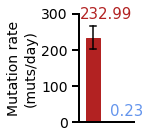

In [49]:
selected_sample = ['AQ5187_vs_AQ5175']
df = df31[df31['clonal']==True]
small_barplot_mut_rate(df,selected_sample,ylim=300,yticks = np.arange(0, 310, 100),x_val1=65,x_val2=30)
plt.savefig('/workspace/projects/sjd_pediatric_tumors/signatures/fitting/msigact/'+selected_sample[0]+'_mut_rate.png',dpi=300, format='png',transparent=True,bbox_inches='tight')


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


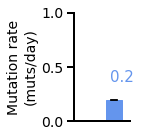

In [50]:
selected_sample = ['AQ5181_vs_AQ5175']
df = df31[df31['clonal']==True]
small_barplot_mut_rate(df,selected_sample,ylim=1,yticks = np.arange(0, 1.1, 0.5),x_val1=10,x_val2=0.2)
plt.savefig('/workspace/projects/sjd_pediatric_tumors/signatures/fitting/msigact/'+selected_sample[0]+'_mut_rate.png',dpi=300, format='png',transparent=True,bbox_inches='tight')
